# 회귀분석이란?
- 지도 학습
<br>
- Y = f(X)에 대하여 입력 변수(X)와 출력 변수(Y)의 관계에 대하여 모델링하는 것
- (Y에 대하여 예측 또는 분류하는 문제)
    - 회귀 : 입력 변수 X에 대해서 연속형 출력 변수 Y를 예측
    - 분류 : 입력 변수 X에 대해서 이산형 출력 변수 Y(class)를 예측

### 회귀분석

- 입력 변수인 X의 정보를 활용하여 출력 변수인 Y를 예측하는 방법
<br>

- 단순 선형회귀분석 : 변수가 하나일 때..
    > Y = B0 + B1X + error
- 입력 변수가 X, 출력 변수가 Y일 때 식.
- B0은 절편, B1은 기울기이며, 합쳐서 회귀계수로도 불림.
> 실제로 B0와 B1은 구할 수 없는 계수로 데이터를 통해 이 둘을 추정해서 사용,.

- 직선과 데이터의 차이가 평균적으로 가장 작아지는 직선이 y를 가장 잘 설명하는 직선이다.

### 회귀계수추정
- 실제 값과 우리가 추정한 값의 차이가 적으면 적을 수록 좋다.
- 그 차이를 잔차라고 하며 이를 최소화 하는 방향으로 추정.
    > e.i = y.i - yhat.i

- SSE (잔차의 제곱합)
    - 잔차의 제곱합을 최소화시키는 이유?
    - 잔차의 합이 0이 되는 해는 무수히 많음.
    - 잔차의 절대값의 합은 미분이 불가능한 형태.
    - 잔차의 제곱 합은 미분이 가능한 형태로 유일한 해를 찾을 수 있음.

### 회귀계수의 의미
- 회귀 계수의 해석
    - B1의 해석 - X1이 1단위 증가할 때마다 y가 B1만큼 증가한다
<br>
      > ex) radio 광고 예산과 매출 간의 관계
    - Radio 광고 예산이 1 증가할 때마다 매출은 0.2단위 만큼 증가한다. 그 때 유의성은 매우 높다.
    - Radio 광고 예산이 35 단위일 때 예상 매출액은 9.312 + 0.203 * 35 =16.42 단위이다.

- 선형 회귀의 정확도 평가
    - 선형회귀는 SSE를 최소화 하는 방법으로 회귀 계수를 추정
    - 즉, SSE가 작으면 작을 수록 좋은 모델이라고 볼 수 있음.
    - MSE는 SSE를 표준화한 개념.

    - SSR(Regression Sum of squares) : 자유도 1 
    - SSE(Error Sum of squares) : 자유도 N-1
    - SST(Total Sum of squares) : 자유도 N-2
 > SST = SSE + SSR

    - Y의 총 변동은 회귀직선으로 설명 가능 및 불가능한 변동으로 이루어져있음.
    - R ** 2는 RSE의 단점을 보완한 평가지표로 0~1의 범위를 가짐.
    - R ** 2는 설명력으로 입력 변수인 X로 설명할 수 있는 Y의 변동을 의미.
    - R ** 2이 1에 가까울 수록 선형회귀 모형의 설명력이 높다는 것을 뜻함.

>> R스퀘어(R ** 2) = 1 - SSE / SST 또는, SSR / SST

    - 회귀 분석은 결국 Y의 변동성을 얼마나 독립변수가 잘 설명하느냐가 중요.
    - 변수가 여러 개일 때 각각 Y를 설명하는 변동성이 크면 좋은 변수.
        -> 이 때 p-value는 자연스레 낮아짐.

### 회귀계수에 대한 검정

- R스퀘어 = 회귀직선을 설명가능한 비율 / 총 변동

- 단순 선형 회귀분석의 검정
- B1의 검정
    - 귀무가설 : B1 = 0 (회귀계수는 0이다, 즉 변수의 설명력이 없다.)
    - 대립가설 : B1 != 0 (0이 아니다, 변수의 설명력이 존재한다.)

# 단순선형회귀분석 실습해보기

In [5]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [6]:
# 현재 경로확인
os.getcwd()

'/Users/hyunsoolee/Documents/GitHub/TIL/Day-12'

In [26]:
# 데이터 불러오기
boston = pd.read_csv('./data/boston_train.csv')

In [27]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
1,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36,23.1
2,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24,13.3
3,8.98296,0.0,18.10,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60,17.8
4,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,23.3


In [28]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.930683,11.624011,11.297757,0.063325,0.558835,6.284269,69.219525,3.762001,9.810026,414.902375,18.446438,356.165831,12.523931,22.596306
std,9.331306,23.862573,7.041391,0.243868,0.120830,0.711232,27.720188,2.127303,8.850660,171.260464,2.203222,92.804536,7.059577,9.570396
min,0.010960,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.082215,0.000000,4.950000,0.000000,0.448000,5.888500,45.800000,2.068550,4.000000,284.000000,17.150000,375.425000,6.765000,16.550000
50%,0.298190,0.000000,9.690000,0.000000,0.538000,6.211000,78.300000,3.066500,5.000000,345.000000,19.100000,391.340000,11.450000,20.900000
75%,3.944055,12.500000,18.100000,0.000000,0.647000,6.622000,94.400000,5.214600,24.000000,666.000000,20.200000,396.235000,16.550000,25.050000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### CRIM / RM / LSTAT 세 개의 변수로 각각 단순 선형 회귀 분석하기
- CRIM : 범죄율
- RM : 주택당 방 수
- LSTAT : 인구 중 하위 계층 비율

In [31]:
target = boston[['target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

### target ~ crim 선형회귀분석

In [32]:
# Crim 변수에 상수항 추가하기
crim1 = sm.add_constant(crim, has_constant="add")
crim1

,const,CRIM
0,1.0,6.53876
1,1.0,0.01870
2,1.0,9.82349
3,1.0,8.98296
4,1.0,0.15445
...,...,...
374,1.0,0.26363
375,1.0,0.32543
376,1.0,0.01432
377,1.0,0.01301


In [34]:
# sm.OLS 적합시키기
model1 = sm.OLS(target, crim1) # y값, 데이터
fitted_model1 = model1.fit()

In [35]:
# summary 함수 통해 결과 출력
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     63.84
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           1.66e-14
Time:                        18:47:21   Log-Likelihood:                -1363.7
No. Observations:                 379   AIC:                             2731.
Df Residuals:                     377   BIC:                             2739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1304      0.494     48.842      0.000      23.159      25.102
CRIM          -0.3903      0.049     -7.990      0.000      -0.486      -0.294
==============================================================================
Omnibus:                      101.144   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.972
Skew:                           1.460   Prob(JB):                     4.60e-43
Kurtosis:                       4.955   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 범죄율이 설명하는 y의 총 변동성(R-squared)은 14.5%이며,
- 범죄율에 해당하는 계수값은 -0.3903, 범죄율이 1단위 증가할 때 y가 -0.39단위 감소한다.
- 그 때의 p-value는 매우 유의미하다.

In [36]:
# 회귀 계수 출력
fitted_model1.params

const    24.130422
CRIM     -0.390292
dtype: float64

### 예측값 y_hat = beta0 + beta1 * X 계산해보기

In [39]:
# 회귀 계수 * 데이터(X)
np.dot(crim1, fitted_model1.params)

array([ 21.57839378,  24.12312305,  20.29638893,  20.62444132,
        24.07014087,  23.88555602,  24.1131823 ,  19.79501553,
        22.22914766,  24.11855272,  22.55426116,  24.12375142,
        24.06500852,  24.08279024,  23.64939795,  23.87145866,
        23.78647642,  24.0016953 ,  21.37869682,  24.09198162,
        22.68902909,  24.09643876,  15.52404681,  20.9488601 ,
        24.09596261,  24.03133801,  24.04783176,  24.04372979,
        23.99729671,  24.08569402,  24.05554003,  24.10924816,
        23.88143063,  23.17550113,  18.53608866,  24.09816385,
        24.1111723 ,  20.91125543,  24.09431167,  22.83424125,
        23.90589025,  21.91888089,  24.12614391,  24.10470906,
        24.09799603,  24.06210085,  24.11812731,  24.01688548,
        21.67623616,  14.60970902,  24.07519515,  24.09939328,
        24.06626136,  24.12275227,  24.10786262,  23.20596735,
        24.12511354,  23.74464489,  23.99290983,  24.12049638,
        23.92195859,  24.07537859,  24.10459587,  24.07

In [40]:
# predict 함수를 통해 yhat 구하기
pred1 = fitted_model1.predict(crim1)

In [42]:
# 직접 구한 yhat과 predict함수를 통해 구한 yhat 차이
np.dot(crim1, fitted_model1.params) - pred1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
374    0.0
375    0.0
376    0.0
377    0.0
378    0.0
Length: 379, dtype: float64

### 적합시킨 직선 시각화

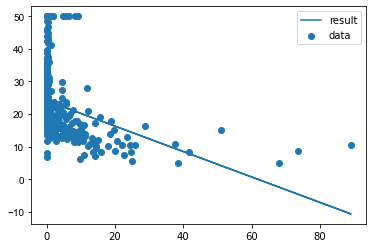

In [44]:
import matplotlib.pyplot as plt
plt.yticks(fontname = 'Arial')
plt.scatter(crim, target, label='data')
plt.plot(crim, pred1, label='result')
plt.legend()
plt.show()

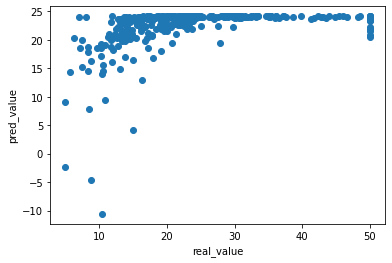

In [45]:
plt.scatter(target, pred1)
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

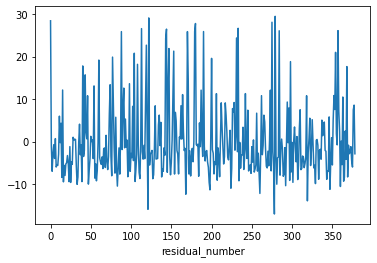

In [46]:
## residual 시각화

fitted_model1.resid.plot()
plt.xlabel('residual_number')
plt.show()

In [48]:
## 잔차의 합계산해보기
np.sum(fitted_model1.resid) # SSE가 최소화가 되게끔 회귀직선을 긋게됨

-1.5774048733874224e-12

### 위와 동일하게 rm 변수와 lstat 변수로 각각 단순선형회귀분석 적합시켜보기

In [50]:
# 상수항추가
rm1 = sm.add_constant(rm, has_constant="add")
lstat1 = sm.add_constant(lstat, has_constant="add")

In [51]:
# 회귀모델 적합

model2 = sm.OLS(target, rm1)
fitted_model2 = model2.fit()

model3 = sm.OLS(target, lstat1)
fitted_model3 = model3.fit()

In [52]:
# 모델 결과 출력
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     371.8
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           3.84e-58
Time:                        19:07:23   Log-Likelihood:                -1263.3
No. Observations:                 379   AIC:                             2531.
Df Residuals:                     377   BIC:                             2538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9906      3.110    -11.895      0.000     -43.105     -30.876
RM             9.4819      0.492     19.283      0.000       8.515      10.449
==============================================================================
Omnibus:                      105.108   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.760
Skew:                           1.041   Prob(JB):                    5.23e-129
Kurtosis:                       8.751   Cond. No.                         57.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# 모델 결과 출력
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     479.8
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           3.38e-69
Time:                        19:07:29   Log-Likelihood:                -1237.7
No. Observations:                 379   AIC:                             2479.
Df Residuals:                     377   BIC:                             2487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3017      0.666     53.036      0.000      33.993      36.610
LSTAT         -1.0145      0.046    -21.905      0.000      -1.106      -0.923
==============================================================================
Omnibus:                       98.075   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.646
Skew:                           1.402   Prob(JB):                     4.00e-42
Kurtosis:                       5.051   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# 각각의 yhat 예측하기
pred2 = fitted_model2.predict(rm1)
pred3 = fitted_model3.predict(lstat1)

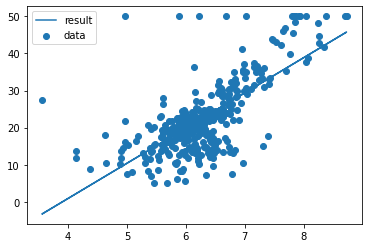

In [55]:
# rm 모델 시각화
plt.scatter(rm, target, label='data')
plt.plot(rm, pred2, label='result')
plt.legend()
plt.show()

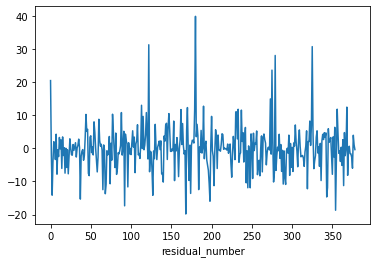

In [57]:
## rm - residual 시각화

fitted_model2.resid.plot()
plt.xlabel('residual_number')
plt.show()

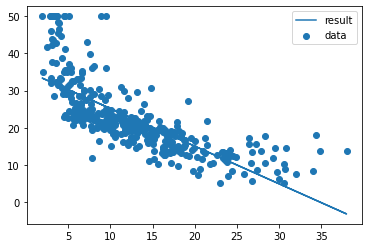

In [56]:
# lstat 모델 시각화
plt.scatter(lstat, target, label='data')
plt.plot(lstat, pred3, label='result')
plt.legend()
plt.show()

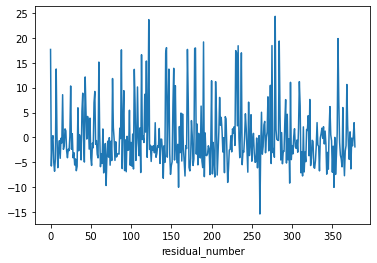

In [58]:
## lstat - residual 시각화

fitted_model3.resid.plot()
plt.xlabel('residual_number')
plt.show()

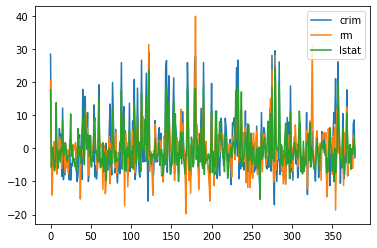

In [60]:
# 세 모델의 residual 비교
fitted_model1.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
plt.legend()